# Data Analysis for Educational Investment
## Introduction
This Jupyter Notebook presents a comprehensive data analysis for educational investment across various countries and sub-regions. The dataset used for this analysis includes indicators related to internet usage, government expenditure on education, GDP per capita, population demographics, and more. The primary goal is to identify countries and sub-regions that exhibit promising potential for educational investment.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing as pp

## Data Source
The analysis is based on two datasets:

**EdStatsData.csv**: This dataset contains educational statistics from various countries, including indicators related to primary, secondary, and tertiary education, internet usage, GDP per capita, and demographic information.

**unstatscountries.csv**: This dataset provides information about countries, including their ISO-alpha3 codes and sub-regions.

In [2]:
# Loading the data
uncountries = pd.read_csv('unstatscountries.csv', delimiter=";")
df = pd.read_csv('EdStatsData.csv')

## Data Cleaning and Preprocessing
The initial phase of the analysis involves data cleaning and preprocessing to ensure the datasets are ready for exploration. Missing values are handled appropriately, and the data is filtered to include only relevant indicators and valid country codes.

In [4]:
# Calculating the proportion of missing values in the entire dataframe
dfmissingvalues = df.isnull().mean().mean()
print("Proportion of missing values in the entire dataframe:", dfmissingvalues)

Proportion of missing values in the entire dataframe: 0.8609985165522804


In [5]:
# Filtering the dataframe to include only specific indicators
selected_indicators = [
    'IT.NET.USER.P2', 'SE.XPD.PRIM.PC.ZS', 'SE.XPD.PRIM.ZS', 'SE.XPD.SECO.PC.ZS',
    'SE.XPD.SECO.ZS', 'SE.XPD.TERT.PC.ZS', 'SE.XPD.TERT.ZS', 'SE.XPD.TOTL.GB.ZS',
    'SE.XPD.TOTL.GD.ZS', 'XGDP.23.FSGOV.FDINSTADM.FFD', 'XGDP.56.FSGOV.FDINSTADM.FFD',
    'NY.GDP.PCAP.CD', 'HH.MICS.YRS.15UP.GIN', 'BAR.POP.1519', 'BAR.POP.2024',
    'BAR.POP.2529', 'BAR.POP.3034', 'BAR.POP.3539', 'SP.POP.AG10.TO.UN',
    'SP.POP.AG11.TO.UN', 'SP.POP.AG12.TO.UN', 'SP.POP.AG13.TO.UN', 'SP.POP.AG14.TO.UN',
    'SP.POP.AG15.TO.UN', 'SP.POP.AG16.TO.UN', 'SP.POP.AG17.TO.UN', 'SP.POP.AG18.TO.UN',
]

In [6]:
dfed = df[df['Indicator Code'].isin(selected_indicators)]

In [7]:
# Filtering the dataframe to include only countries with valid codes
dfed = dfed[dfed['Country Code'].isin(uncountries['ISO-alpha3 Code'])]

In [8]:
# Merging with the 'uncountries' dataframe to add 'Sub-region Name'
uncountriessr = uncountries.loc[:, ['ISO-alpha3 Code', 'Sub-region Name']]
dfed['Sub-region Name'] = dfed['Country Code'].map(uncountries.set_index('ISO-alpha3 Code')['Sub-region Name'])

In [9]:
# Calculating the average score for each country based on the selected indicators
dfed['Average'] = dfed.mean(numeric_only=True, axis=1)

## Data Exploration and Visualization
The data exploration process includes visualizing the proportion of missing values, understanding the distribution of the selected indicators, and calculating average scores for countries based on these indicators. Additionally, the top 15 countries with the highest investment scores are identified and visualized through bar charts.

Furthermore, a choropleth map is created to showcase investment scores across all countries, providing a global perspective on educational investment potential.

Proportion of missing values in the filtered dataframe:
92107     0.791667
92109     0.791667
92113     0.791667
92115     0.791667
92117     0.791667
            ...   
885626    0.569444
885629    0.569444
885632    0.569444
885635    0.569444
885638    0.569444
Length: 5805, dtype: float64
Proportion of missing values in the pivot table:
Indicator Code
Country Name                   0.000000
Country Code                   0.000000
BAR.POP.1519                   0.323944
BAR.POP.2024                   0.323944
BAR.POP.2529                   0.323944
BAR.POP.3034                   0.323944
BAR.POP.3539                   0.323944
HH.MICS.YRS.15UP.GIN           0.816901
IT.NET.USER.P2                 0.023474
NY.GDP.PCAP.CD                 0.028169
SE.XPD.PRIM.PC.ZS              0.230047
SE.XPD.PRIM.ZS                 0.136150
SE.XPD.SECO.PC.ZS              0.244131
SE.XPD.SECO.ZS                 0.136150
SE.XPD.TERT.PC.ZS              0.197183
SE.XPD.TERT.ZS                 0.098592
SE

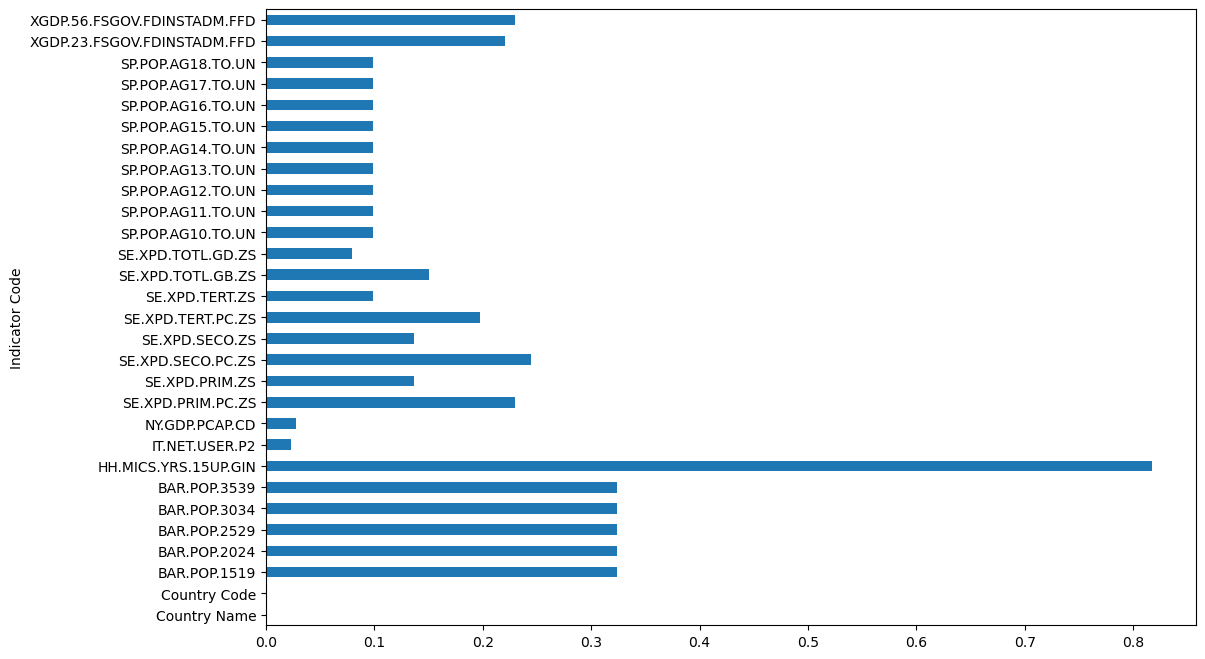

In [11]:
# Data Exploration

# Checking the proportion of missing values in the filtered dataframe
print("Proportion of missing values in the filtered dataframe:")
print(dfed.isnull().mean(axis=1))

# Pivot table to reshape the data for better visualization
dfedcp = pd.pivot_table(dfed, index=['Country Name', 'Country Code'], columns='Indicator Code', values='Average')
dfedcp = dfedcp.reset_index()

# Checking the proportion of missing values in the pivot table
print("Proportion of missing values in the pivot table:")
print(dfedcp.isnull().mean(axis=0))

# Plotting the proportion of missing values for each indicator
dfedcp.isnull().mean(axis=0).plot.barh(figsize=(12, 8))

# Selecting and dropping columns with more than 15% missing values
droplist = dfedcp.columns[dfedcp.isnull().mean() >= 0.15].tolist()
dfedcp = dfedcp.drop(columns=droplist)

In [12]:
# Data Normalization
# Fill NaN values with zeros
dfedcp.fillna(0, inplace=True)

# Removing the last weight element to match the number of columns in the DataFrame
weights = [10, 7, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Calculating a weighted score based on specific indicators
dfedcp['Score'] = dfedcp.iloc[:, 3:17].dot(weights) / sum(weights)

# Normalizing the numeric columns in the dataframe
dfedcp.iloc[:, 3:20] = pp.normalize(dfedcp.iloc[:, 3:20])

# Calculating a weighted score based on specific indicators
weights = [10, 7, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dfedcp['Score'] = dfedcp.iloc[:, 3:20].dot(weights) / sum(weights)# Data Normalization

## Sub-Region Analysis
In addition to country-level analysis, the notebook also examines investment potential at the sub-regional level. The top five sub-regions with the highest average scores are identified and presented through bar charts.

/tmp/ipykernel_17134/3538237180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfedc.sort_values(by=['Score'], inplace=True, ascending=False)


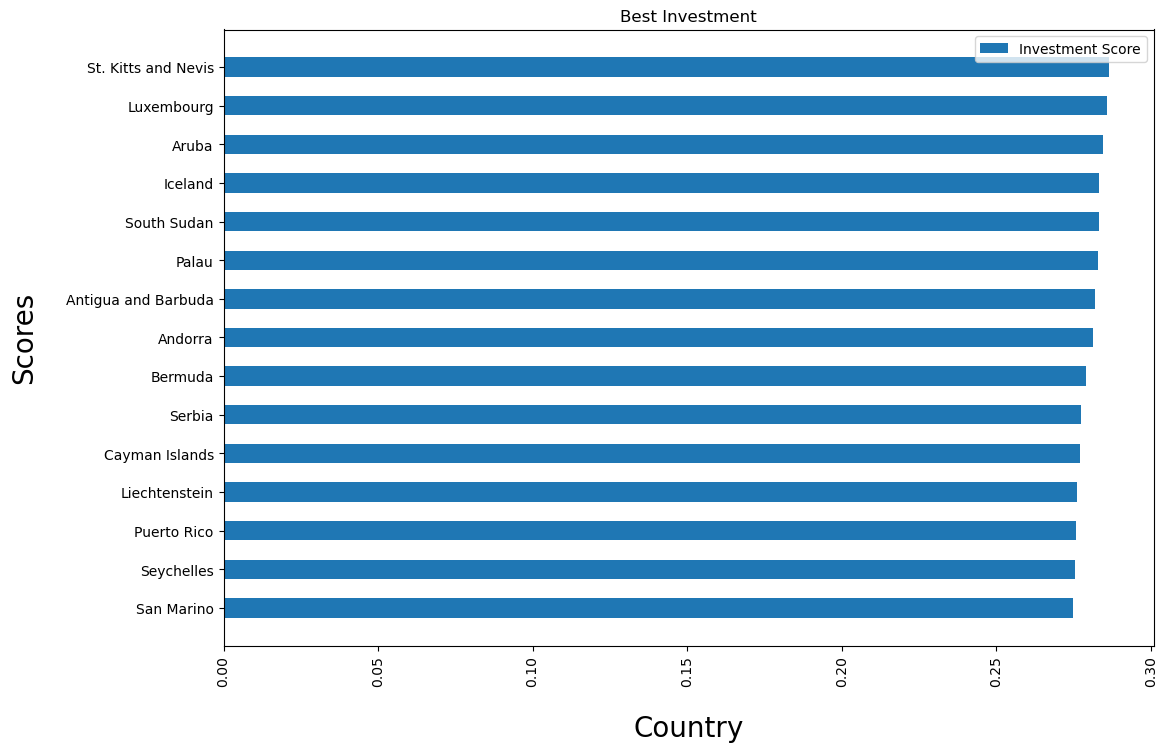

In [ ]:
# Sorting countries based on their investment scores
dfedc = dfedcp[['Country Name', 'Country Code', 'Score']]
dfedc.sort_values(by=['Score'], inplace=True, ascending=False)

# Visualizing the top 15 countries with the highest investment scores
labels = dfedc['Country Name'].head(15)
score = dfedc['Score'].head(15)
width = 0.5

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(labels, score, width, label='Investment Score')
ax.set_ylabel('Scores', rotation=90, fontsize=20, labelpad=20)
ax.set_xlabel('Country', rotation=0, fontsize=20, labelpad=20)
ax.set_title('Best Investment')
ax.set_ylim(ax.get_ylim()[::-1])
ax.legend()
plt.xticks(rotation=90)
plt.show()

# Visualizing the investment scores for the rest of the countries on a choropleth map
fig = px.choropleth(dfedc.iloc[15:], locations="Country Code",
                    color="Score",
                    hover_name="Country Name",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

/tmp/ipykernel_17134/1116201379.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



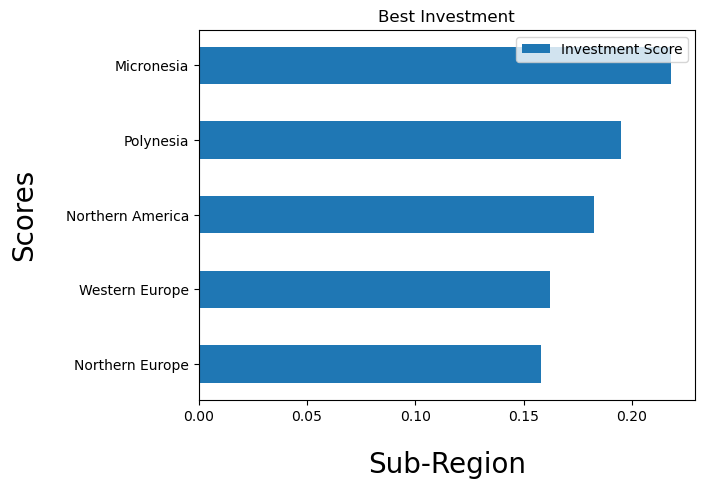

In [15]:
# Creating a top 5 list of Sub-regions based on average scores
dfedc['Sub-region Name'] = dfedc['Country Code'].map(uncountries.set_index('ISO-alpha3 Code')['Sub-region Name'])
dfedsp = pd.pivot_table(dfedc, columns=['Sub-region Name'], values=['Score'])
dfedsp = dfedsp.reset_index()
dfeds = pd.DataFrame(dfedsp.mean(numeric_only=True, axis=0))
dfeds = dfeds.reset_index()
dfeds.columns = ['Sub-region Name', 'Score']
dfeds.sort_values(by=['Score'], inplace=True, ascending=False)

# Visualizing the top 5 Sub-regions with the highest average scores
labels = dfeds['Sub-region Name'].head(5)
score = dfeds['Score'].head(5)
width = 0.5

fig, ax = plt.subplots()
ax.barh(labels, score, width, label='Investment Score')
ax.set_ylabel('Scores', rotation=90, fontsize=20, labelpad=20)
ax.set_xlabel('Sub-Region', rotation=0, fontsize=20, labelpad=20)
ax.set_title('Best Investment')
ax.set_ylim(ax.get_ylim()[::-1])
ax.legend()
plt.xticks(rotation=0)
plt.show()

In [16]:
# Visualizing the investment scores for the rest of the countries on a choropleth map
fig = px.choropleth(dfedc.iloc[15:], locations="Country Code",
                    color="Score",
                    hover_name="Country Name",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

## Conclusion
The data analysis in this notebook sheds light on countries and sub-regions that display strong potential for educational investment. The investment scores are calculated based on selected indicators, providing valuable insights for policymakers and investors in the education sector.